In [7]:
from sklearn.cluster import KMeans

In [4]:
from sklearn.decomposition import PCA

In [6]:
import pandas as pd

In [8]:
import numpy as np

In [110]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [14]:
import sqlite3

conn = sqlite3.connect("../db.sqlite3")

print("Open Database successfully")

Open Database successfully


In [19]:
cur = conn.cursor()
table_name = cur.execute("select name from sqlite_master where type='table' order by name").fetchall()
table_name

[('Training',),
 ('UserTemp',),
 ('account_confirmstring',),
 ('account_profile_awardhistory',),
 ('account_profile_awardhistory_User',),
 ('account_profile_competitionrecord',),
 ('account_profile_honortitle',),
 ('account_profile_paperrecord',),
 ('account_profile_patentrecord',),
 ('account_profile_publishrecord',),
 ('account_profile_researchproject',),
 ('account_user',),
 ('account_user_groups',),
 ('account_user_user_permissions',),
 ('auth_group',),
 ('auth_group_permissions',),
 ('auth_permission',),
 ('award_info_awardclassification',),
 ('award_info_awardinfo',),
 ('award_info_awardinfo_Major',),
 ('award_info_awardinfopost',),
 ('award_info_category',),
 ('award_info_post',),
 ('award_info_post_tags',),
 ('award_info_post_users_focus',),
 ('award_info_tag',),
 ('captcha_captchastore',),
 ('django_admin_log',),
 ('django_content_type',),
 ('django_migrations',),
 ('django_session',),
 ('grade_info_deptinfo',),
 ('grade_info_gradeinfo',),
 ('grade_info_lessoninfo',),
 ('grade

In [21]:
cur.execute("PRAGMA table_info(account_profile_paperrecord)")
cur.fetchall()

[(0, 'id', 'integer', 1, None, 1),
 (1, 'publishDate', 'date', 1, None, 0),
 (2, 'name', 'varchar(256)', 1, None, 0),
 (3, 'abstract', 'text', 0, None, 0),
 (4, 'magzineName', 'varchar(256)', 0, None, 0),
 (5, 'authOrder', 'varchar(1)', 1, None, 0),
 (6, 'totalAuthor', 'integer', 1, None, 0),
 (7, 'postStatus', 'varchar(2)', 1, None, 0),
 (8, 'totalReference', 'decimal', 1, None, 0),
 (9, 'conferenceChoice', 'varchar(2)', 1, None, 0),
 (10, 'SchoolYear_id', 'integer', 1, None, 0),
 (11, 'User_id', 'integer', 1, None, 0)]

In [22]:
csv_head = ["id", "User_id", "authOrder", "conferenceChoice"]

In [45]:
paper_record = conn.execute(("select {} from account_profile_paperrecord").
                            format(",".join(csv_head))).fetchall()

构建CSV

In [47]:
paper_record

[(532, 3889, 'f', 'ic'),
 (533, 3889, 'f', 'tm'),
 (534, 3889, 'f', 'ic'),
 (535, 3900, 'f', 'ic'),
 (536, 3102, 't', 'ic'),
 (537, 3163, 'f', 'im'),
 (538, 3163, 'f', 'im'),
 (539, 3897, 'f', 'tm'),
 (540, 4323, 'f', 'nc'),
 (541, 3037, 'f', 'ic'),
 (542, 3037, 'f', 'ic'),
 (543, 3587, 'f', 'ic'),
 (544, 3877, 'f', 'ic'),
 (545, 3893, 'f', 'ic'),
 (546, 3836, 'f', 'ic'),
 (547, 3925, 's', 'tm'),
 (548, 4021, 'f', 'im'),
 (549, 3922, 'f', 'ic'),
 (550, 3840, 's', 'nc'),
 (551, 3839, 's', 'ic'),
 (552, 3936, 's', 'nm'),
 (553, 3936, 's', 'nc'),
 (554, 3005, 'f', 'tm'),
 (555, 3005, 'f', 'tm'),
 (556, 3858, 'f', 'ic'),
 (557, 3858, 's', 'os'),
 (558, 3927, 's', 'tm'),
 (559, 3885, 'f', 'ic'),
 (560, 3917, 'f', 'ic'),
 (561, 3834, 'f', 'ic'),
 (562, 3895, 'f', 'ic'),
 (563, 3866, 's', 'nc'),
 (564, 3198, 's', 'im'),
 (565, 3198, 'f', 'nm'),
 (566, 3933, 'f', 'ic'),
 (567, 3948, 's', 'tm'),
 (568, 3948, 's', 'ic'),
 (569, 3174, 'f', 'ic'),
 (570, 4201, 'f', 'ic'),
 (571, 3874, 'f', 'ic'),


构建CSV

In [48]:
import csv
with open("paper_record.csv", "w", newline="") as f:
    ff = csv.writer(f)
    ff.writerow(csv_head)
    ff.writerows(paper_record)

In [74]:
df_paper = pd.read_csv("paper_record.csv", header=0, encoding="utf-8")
df_paper_regression_one_hot = df_paper.loc[:, [False, False, True, True]].copy()
df_paper_regression_fact = df_paper_regression_one_hot.copy()

确定Mapping

##### 使用自定义mapping(factorize)

In [75]:
conference_mapping = {
    'ic': 1,
    'im': 2,
    'nc': 3,
    'nm': 4,
    'os': 5,
    'tm': 6
}

auth_mapping = {
    'f': 1,
    'r': 2,
    's': 3,
    't': 4,
}

# df_paper_regression['authOrder'] = pd.factorize(df_paper_regression['authOrder'])
# df_paper_regression['conferenceChoice'] = pd.factorize(df_paper_regression['conferenceChoice'])

df_paper_regression_fact['authOrder'] = df_paper_regression_fact['authOrder'].map(auth_mapping)
df_paper_regression_fact['conferenceChoice'] = df_paper_regression_fact['conferenceChoice'].map(conference_mapping)

##### 使用one-hot encoding

In [76]:
df_paper_regression_one_hot = pd.get_dummies(df_paper_regression_one_hot)
print(df_paper_regression_one_hot)

    authOrder_f  authOrder_r  authOrder_s  authOrder_t  conferenceChoice_ic  \
0             1            0            0            0                    1   
1             1            0            0            0                    0   
2             1            0            0            0                    1   
3             1            0            0            0                    1   
4             0            0            0            1                    1   
..          ...          ...          ...          ...                  ...   
83            1            0            0            0                    1   
84            1            0            0            0                    1   
85            0            1            0            0                    1   
86            1            0            0            0                    1   
87            1            0            0            0                    1   

    conferenceChoice_im  conferenceChoice_nc  confe

##### one-hot 输出

In [77]:
kmeans_one_hot = KMeans(n_clusters=5, random_state=10).fit(df_paper_regression_one_hot)

In [78]:
kmeans_one_hot.labels_

array([2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 1, 2, 0, 4, 0, 0,
       1, 1, 2, 0, 3, 2, 2, 2, 2, 0, 0, 1, 2, 3, 4, 2, 2, 2, 2, 2, 2, 1,
       2, 3, 3, 3, 4, 1, 3, 3, 0, 2, 4, 2, 4, 1, 4, 2, 2, 1, 2, 2, 1, 2,
       3, 2, 0, 4, 1, 3, 1, 0, 0, 0, 2, 2, 2, 0, 3, 2, 4, 2, 2, 2, 2, 2],
      dtype=int32)

##### factorize输出

In [79]:
kmeans_factorize = KMeans(n_clusters=5, random_state=10).fit(df_paper_regression_fact)
kmeans_factorize.labels_

array([1, 4, 1, 1, 2, 1, 1, 4, 0, 1, 1, 1, 1, 1, 1, 3, 1, 1, 0, 2, 0, 0,
       4, 4, 1, 3, 3, 1, 1, 1, 1, 0, 2, 0, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 3, 2, 1, 3, 3, 0, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 2, 2, 4, 3, 0, 2, 2, 2, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1],
      dtype=int32)

可以看到one-hot的输出结果和factorize有所差异，归根结底是距离度量的问题

In [80]:
kmeans_factorize.cluster_centers_

array([[2.25      , 3.375     ],
       [1.0625    , 1.16666667],
       [3.06666667, 1.4       ],
       [3.        , 5.91666667],
       [1.        , 6.        ]])

##### 保存聚类结果输出CSV

Factorize结果

In [112]:
df_paper_regression_fact['labels'] = kmeans_factorize.labels_

In [91]:
df_paper_regression_fact

,authOrder,conferenceChoice,labels
0,1,1,1
1,1,6,4
2,1,1,1
3,1,1,1
4,4,1,2
...,...,...,...
83,1,1,1
84,1,1,1
85,2,1,1
86,1,1,1


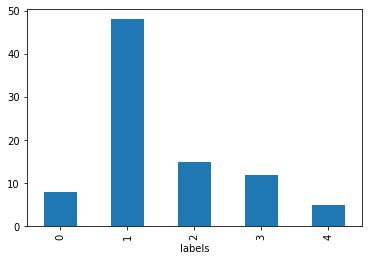

In [111]:
df_paper_regression_fact.groupby('labels')['labels'].count().plot(kind="bar")

In [113]:
df_paper_regression_fact.to_csv('paper_regression_fact.csv')

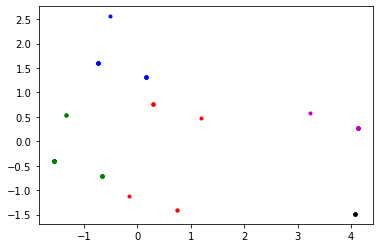

In [115]:
pca = PCA(n_components=2)
new_pca = pd.DataFrame(pca.fit_transform(df_paper_regression_fact))
d = new_pca[df_paper_regression_fact['labels'] == 0]
plt.plot(d[0], d[1], 'r.')
d = new_pca[df_paper_regression_fact['labels'] == 2]
plt.plot(d[0], d[1], 'b.')
d = new_pca[df_paper_regression_fact['labels'] == 1]
plt.plot(d[0], d[1], 'g.')
d = new_pca[df_paper_regression_fact['labels'] == 3]
plt.plot(d[0], d[1], 'm.')
d = new_pca[df_paper_regression_fact['labels'] == 4]
plt.plot(d[0], d[1], 'k.')
plt.show()

one-hot结果

In [83]:
df_paper_regression_one_hot['labels'] = kmeans_one_hot.labels_

In [104]:
df_paper_regression_one_hot

,authOrder_f,authOrder_r,authOrder_s,authOrder_t,conferenceChoice_ic,conferenceChoice_im,conferenceChoice_nc,conferenceChoice_nm,conferenceChoice_os,conferenceChoice_tm,labels
0,1,0,0,0,1,0,0,0,0,0,2
1,1,0,0,0,0,0,0,0,0,1,1
2,1,0,0,0,1,0,0,0,0,0,2
3,1,0,0,0,1,0,0,0,0,0,2
4,0,0,0,1,1,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
83,1,0,0,0,1,0,0,0,0,0,2
84,1,0,0,0,1,0,0,0,0,0,2
85,0,1,0,0,1,0,0,0,0,0,2
86,1,0,0,0,1,0,0,0,0,0,2


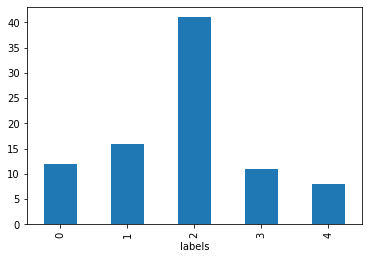

In [109]:
%matplotlib inline
df_paper_regression_one_hot.groupby('labels')['labels'].count().plot(kind='bar')

In [118]:
df_paper_regression_one_hot.to_csv("paper_regression_one_hot.csv")

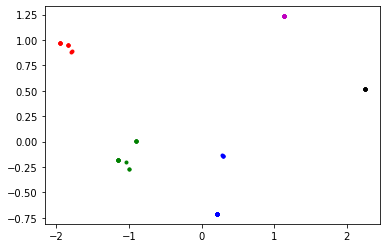

In [117]:
pca = PCA(n_components=2)
new_pca = pd.DataFrame(pca.fit_transform(df_paper_regression_one_hot))
d = new_pca[df_paper_regression_one_hot['labels'] == 0]
plt.plot(d[0], d[1], 'r.')
d = new_pca[df_paper_regression_one_hot['labels'] == 2]
plt.plot(d[0], d[1], 'b.')
d = new_pca[df_paper_regression_one_hot['labels'] == 1]
plt.plot(d[0], d[1], 'g.')
d = new_pca[df_paper_regression_one_hot['labels'] == 3]
plt.plot(d[0], d[1], 'm.')
d = new_pca[df_paper_regression_one_hot['labels'] == 4]
plt.plot(d[0], d[1], 'k.')
plt.show()

从上述明显看出one-hot后聚类效果更好